In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
pd.options.display.max_rows = 10

# Previously calculated Median Individual Income

In [4]:
incs = pd.read_csv('../input/indiIncomes.csv')
incs.set_index('Age', inplace = True)
incs = incs.iloc[:, 1:]
incs

,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,...,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965
Age,,,,,,,,,,,,,,,,,,,,,
0,9451,8864,8819,8965,9370,8750,8518,8243,8181,7963,...,1858,1641,1515,1481,1403,1296,1143,0,0,0
1,9516,9225,9090,8700,9093,9137,8794,8564,8228,8181,...,1839,1657,1497,1444,1419,1296,1151,0,0,0
2,9416,9165,8888,8851,9733,9577,9090,8840,8539,8154,...,1921,1732,1635,1513,1393,1323,1178,0,0,0
3,9249,9337,8781,8755,9606,9444,9259,8888,8529,8250,...,1901,1762,1539,1456,1406,1296,1162,0,0,0
4,9349,9306,9259,9259,9374,9631,9137,9000,8556,8154,...,1889,1685,1580,1450,1403,1296,1155,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,2305,1564,1428,1358,1483,2425,420,1049,1044,1176
96,0,0,0,0,0,0,0,0,0,0,...,3701,3245,1899,1621,1522,1510,1344,808,1648,567
97,0,0,0,0,0,0,0,0,0,0,...,3297,1129,1173,888,1040,2178,400,2375,815,2411


# Formulate Annual Death Rates in the USA

### Direct from social security life tables
 https://www.ssa.gov/oact/HistEst/Death/2016/DeathProbabilities2016.html

In [5]:
prob_death = pd.read_excel('../input/SSLifeTable.xlsx')
prob_death.set_index('Year', inplace = True)
prob_death = prob_death.iloc[65:, 0:100]
prob_death.index.rename('Age', inplace = True)
prob_death = prob_death.T
prob_death = prob_death[prob_death.columns[::-1]]

Subtract each value from one to get the probability of surviving one year at each age.

In [6]:
prob_death = prob_death.apply(lambda x: 1 - x)
prob_death

Age,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,...,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965
0,0.993481,0.993497,0.993431,0.993320,0.993010,0.992815,0.992621,0.992651,0.992434,0.992526,...,0.981269,0.980193,0.979354,0.978733,0.977542,0.976505,0.975451,0.974872,0.973450,0.972473
1,0.999538,0.999555,0.999556,0.999564,0.999553,0.999495,0.999506,0.999535,0.999478,0.999487,...,0.998822,0.998725,0.998725,0.998717,0.998681,0.998616,0.998510,0.998493,0.998326,0.998392
2,0.999709,0.999700,0.999709,0.999696,0.999699,0.999682,0.999683,0.999679,0.999642,0.999672,...,0.999178,0.999120,0.999102,0.999130,0.999090,0.999039,0.999011,0.999010,0.998970,0.998969
3,0.999791,0.999783,0.999774,0.999768,0.999767,0.999752,0.999759,0.999756,0.999745,0.999753,...,0.999307,0.999290,0.999282,0.999265,0.999222,0.999234,0.999233,0.999206,0.999205,0.999199
4,0.999824,0.999809,0.999827,0.999828,0.999823,0.999811,0.999800,0.999806,0.999796,0.999795,...,0.999440,0.999387,0.999407,0.999378,0.999360,0.999352,0.999340,0.999334,0.999318,0.999299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.736179,0.736671,0.733116,0.733547,0.735722,0.725517,0.729250,0.722055,0.712900,0.721969,...,0.727108,0.712944,0.716313,0.717173,0.719233,0.704439,0.690273,0.709218,0.701038,0.698850
96,0.716167,0.716660,0.712783,0.713375,0.715830,0.704936,0.709185,0.701270,0.691531,0.701890,...,0.711773,0.696477,0.700302,0.701583,0.703464,0.687328,0.672053,0.692939,0.684384,0.682008
97,0.697084,0.697583,0.693408,0.694132,0.696834,0.685269,0.689970,0.681399,0.671084,0.682568,...,0.696171,0.679811,0.684030,0.685643,0.687419,0.670049,0.653726,0.676361,0.667402,0.664852
98,0.679328,0.679841,0.675402,0.676218,0.679122,0.666912,0.671978,0.662837,0.651960,0.664345,...,0.680352,0.663016,0.667554,0.669388,0.671148,0.652683,0.635393,0.659534,0.650140,0.647432


# Calculate Median Expected Income

In [7]:
expect_incs = pd.DataFrame(incs.values * prob_death.values, columns = incs.columns, index = incs.index)
expect_incs

,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,...,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965
Age,,,,,,,,,,,,,,,,,,,,,
0,9389.388931,8806.357408,8761.067989,8905.113800,9304.503700,8687.131250,8455.145678,8182.422193,8119.102554,7903.484538,...,1823.197802,1608.496713,1483.721310,1449.503573,1371.491426,1265.550480,1114.940493,0.000000,0.000000,0.000000
1,9511.603608,9220.894875,9085.964040,8696.206800,9088.935429,9132.385815,8789.655764,8560.017740,8223.704984,8176.803147,...,1836.833658,1654.887325,1495.091325,1442.147348,1417.128339,1294.206336,1149.285010,0.000000,0.000000,0.000000
2,9413.259944,9162.250500,8885.413592,8848.309296,9730.070367,9573.954514,9087.118470,8837.162360,8535.943038,8151.325488,...,1919.420938,1730.475840,1633.531770,1511.683690,1391.732370,1321.728597,1176.834958,0.000000,0.000000,0.000000
3,9247.066959,9334.973871,8779.015494,8752.968840,9603.761802,9441.657888,9256.768581,8885.831328,8526.825105,8247.962250,...,1899.682607,1760.748980,1537.894998,1454.929840,1404.906132,1295.007264,1161.108746,0.000000,0.000000,0.000000
4,9347.354576,9304.222554,9257.398193,9257.407452,9372.340802,9629.179741,9135.172600,8998.254000,8554.254576,8152.328430,...,1887.942160,1683.967095,1579.063060,1449.098100,1402.102080,1295.160192,1154.237700,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1675.983940,1115.044416,1022.894964,973.920934,1066.622539,1708.264575,289.914660,743.969682,731.883672,821.847600
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2634.271873,2260.067865,1329.873498,1137.266043,1070.672208,1037.865280,903.239232,559.894712,1127.864832,386.698536
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2295.275787,767.506619,802.367190,608.850984,714.915760,1459.366722,261.490400,1606.357375,543.932630,1602.958172


In [8]:
MELI = pd.DataFrame(expect_incs.sum(axis = 0), columns = ['MELI'])

In [13]:
MELI = MELI.sort_index(ascending = True)
MELI

,MELI
1965,1.765151e+05
1966,1.875847e+05
1967,1.992214e+05
1968,1.932412e+05
1969,2.186144e+05
...,...
2009,1.564214e+06
2010,1.515174e+06
2011,1.528344e+06
2012,1.565069e+06


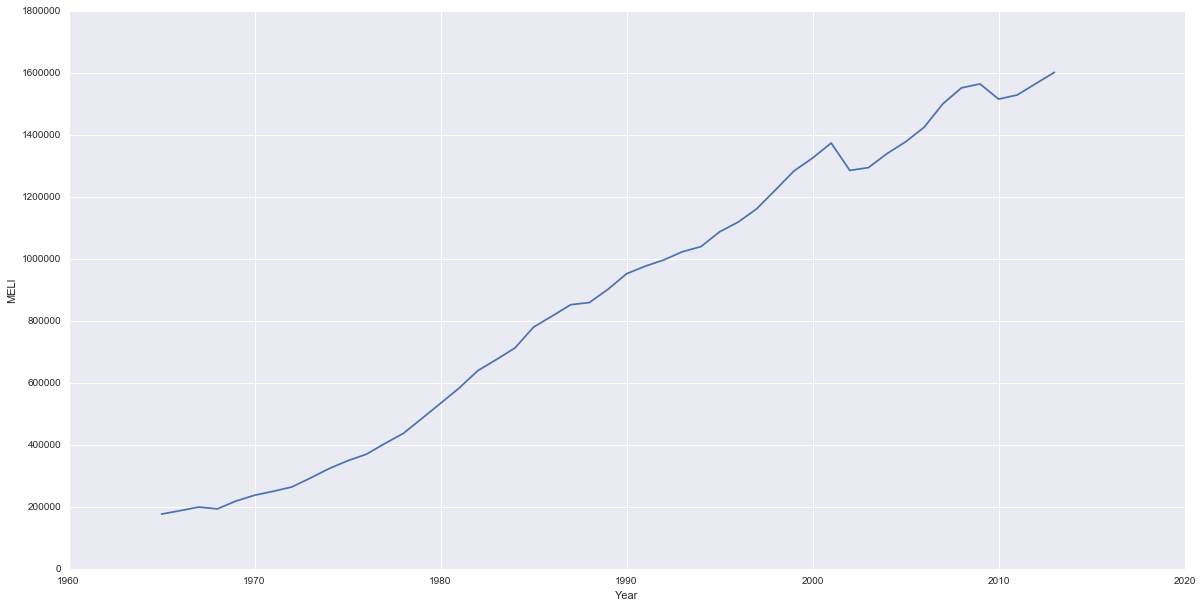

In [23]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(MELI.index, MELI.MELI)
plt.xlabel('Year')
plt.ylabel('MELI')
plt.show()

In [25]:
MELI.to_excel('../output/MELI.xlsx')